In [ ]:
import pandas as pd

from dataProcessing import DataProcessing

# Чтение CSV файла
df = pd.read_csv('Coffe_sales.csv')

# Проверка что данные загружены
print("Размер данных:", df.shape)
print("Колонки:", df.columns.tolist())
print("\nПервые 5 строк:")
print(df.head())

# Создание экземпляра класса с данными
data_processor = DataProcessing(df)

# Теперь можно использовать методы класса
print("\nИнформация о данных:")
print(data_processor.get_data_info())

print("\nПропущенные значения:")
print(data_processor.get_empty_values())

# Удаление дубликатов
data_processor.remove_duplicates()

# Получение обработанных данных
processed_df = data_processor.get_processed_data()



In [ ]:
from dataLoader import DataLoader
from dataProcessing import DataProcessing
from dataVisualizer import DataVisualizer

# Загрузка данных
loader = DataLoader()
df = loader.load_csv('Coffe_sales.csv')

# Обработка данных
processor = DataProcessing(df)
processor.fill_missing_values(strategy='mode')

# Создание визуализаций
visualizer = DataVisualizer(processor.get_processed_data())

# Добавление гистограмм
visualizer.add_sales_by_hour_histogram()
visualizer.add_coffee_sales_histogram()
visualizer.add_payment_method_histogram()

# Добавление линейных графиков
visualizer.add_daily_sales_trend()
visualizer.add_hourly_sales_trend()
visualizer.add_weekly_sales_trend()

# Добавление диаграмм рассеяния
visualizer.add_hour_vs_sales_scatter()
visualizer.add_coffee_price_scatter()
visualizer.add_weekday_sales_scatter()

# Дополнительные визуализации
visualizer.add_coffee_sales_pie()
visualizer.add_time_of_day_sales()

# Показать список всех графиков
print("Доступные графики:", visualizer.list_figures())

# Показать конкретный график
visualizer.show_figure('coffee_sales')

# Удалить график
visualizer.remove_figure('payment_methods')

# Сохранить график
visualizer.save_figure('hourly_sales_trend', 'hourly_sales.png')

# Показать все оставшиеся графики
visualizer.show_all_figures()

Размер тренировочной выборки: (2837, 8)
Размер тестовой выборки: (710, 8)

Оценка модели:
Mean Squared Error: 16.7114
R² Score: 0.2695

Коэффициенты модели:
hour_of_day: 0.7640
cash_type_encoded: -0.0000
coffee_name_encoded: 2.0680
Time_of_Day_encoded: 0.0717
Weekday_encoded: -0.0607
Month_name_encoded: 0.2523
Weekdaysort: -0.0399
Monthsort: -0.6258
Intercept: 31.6089


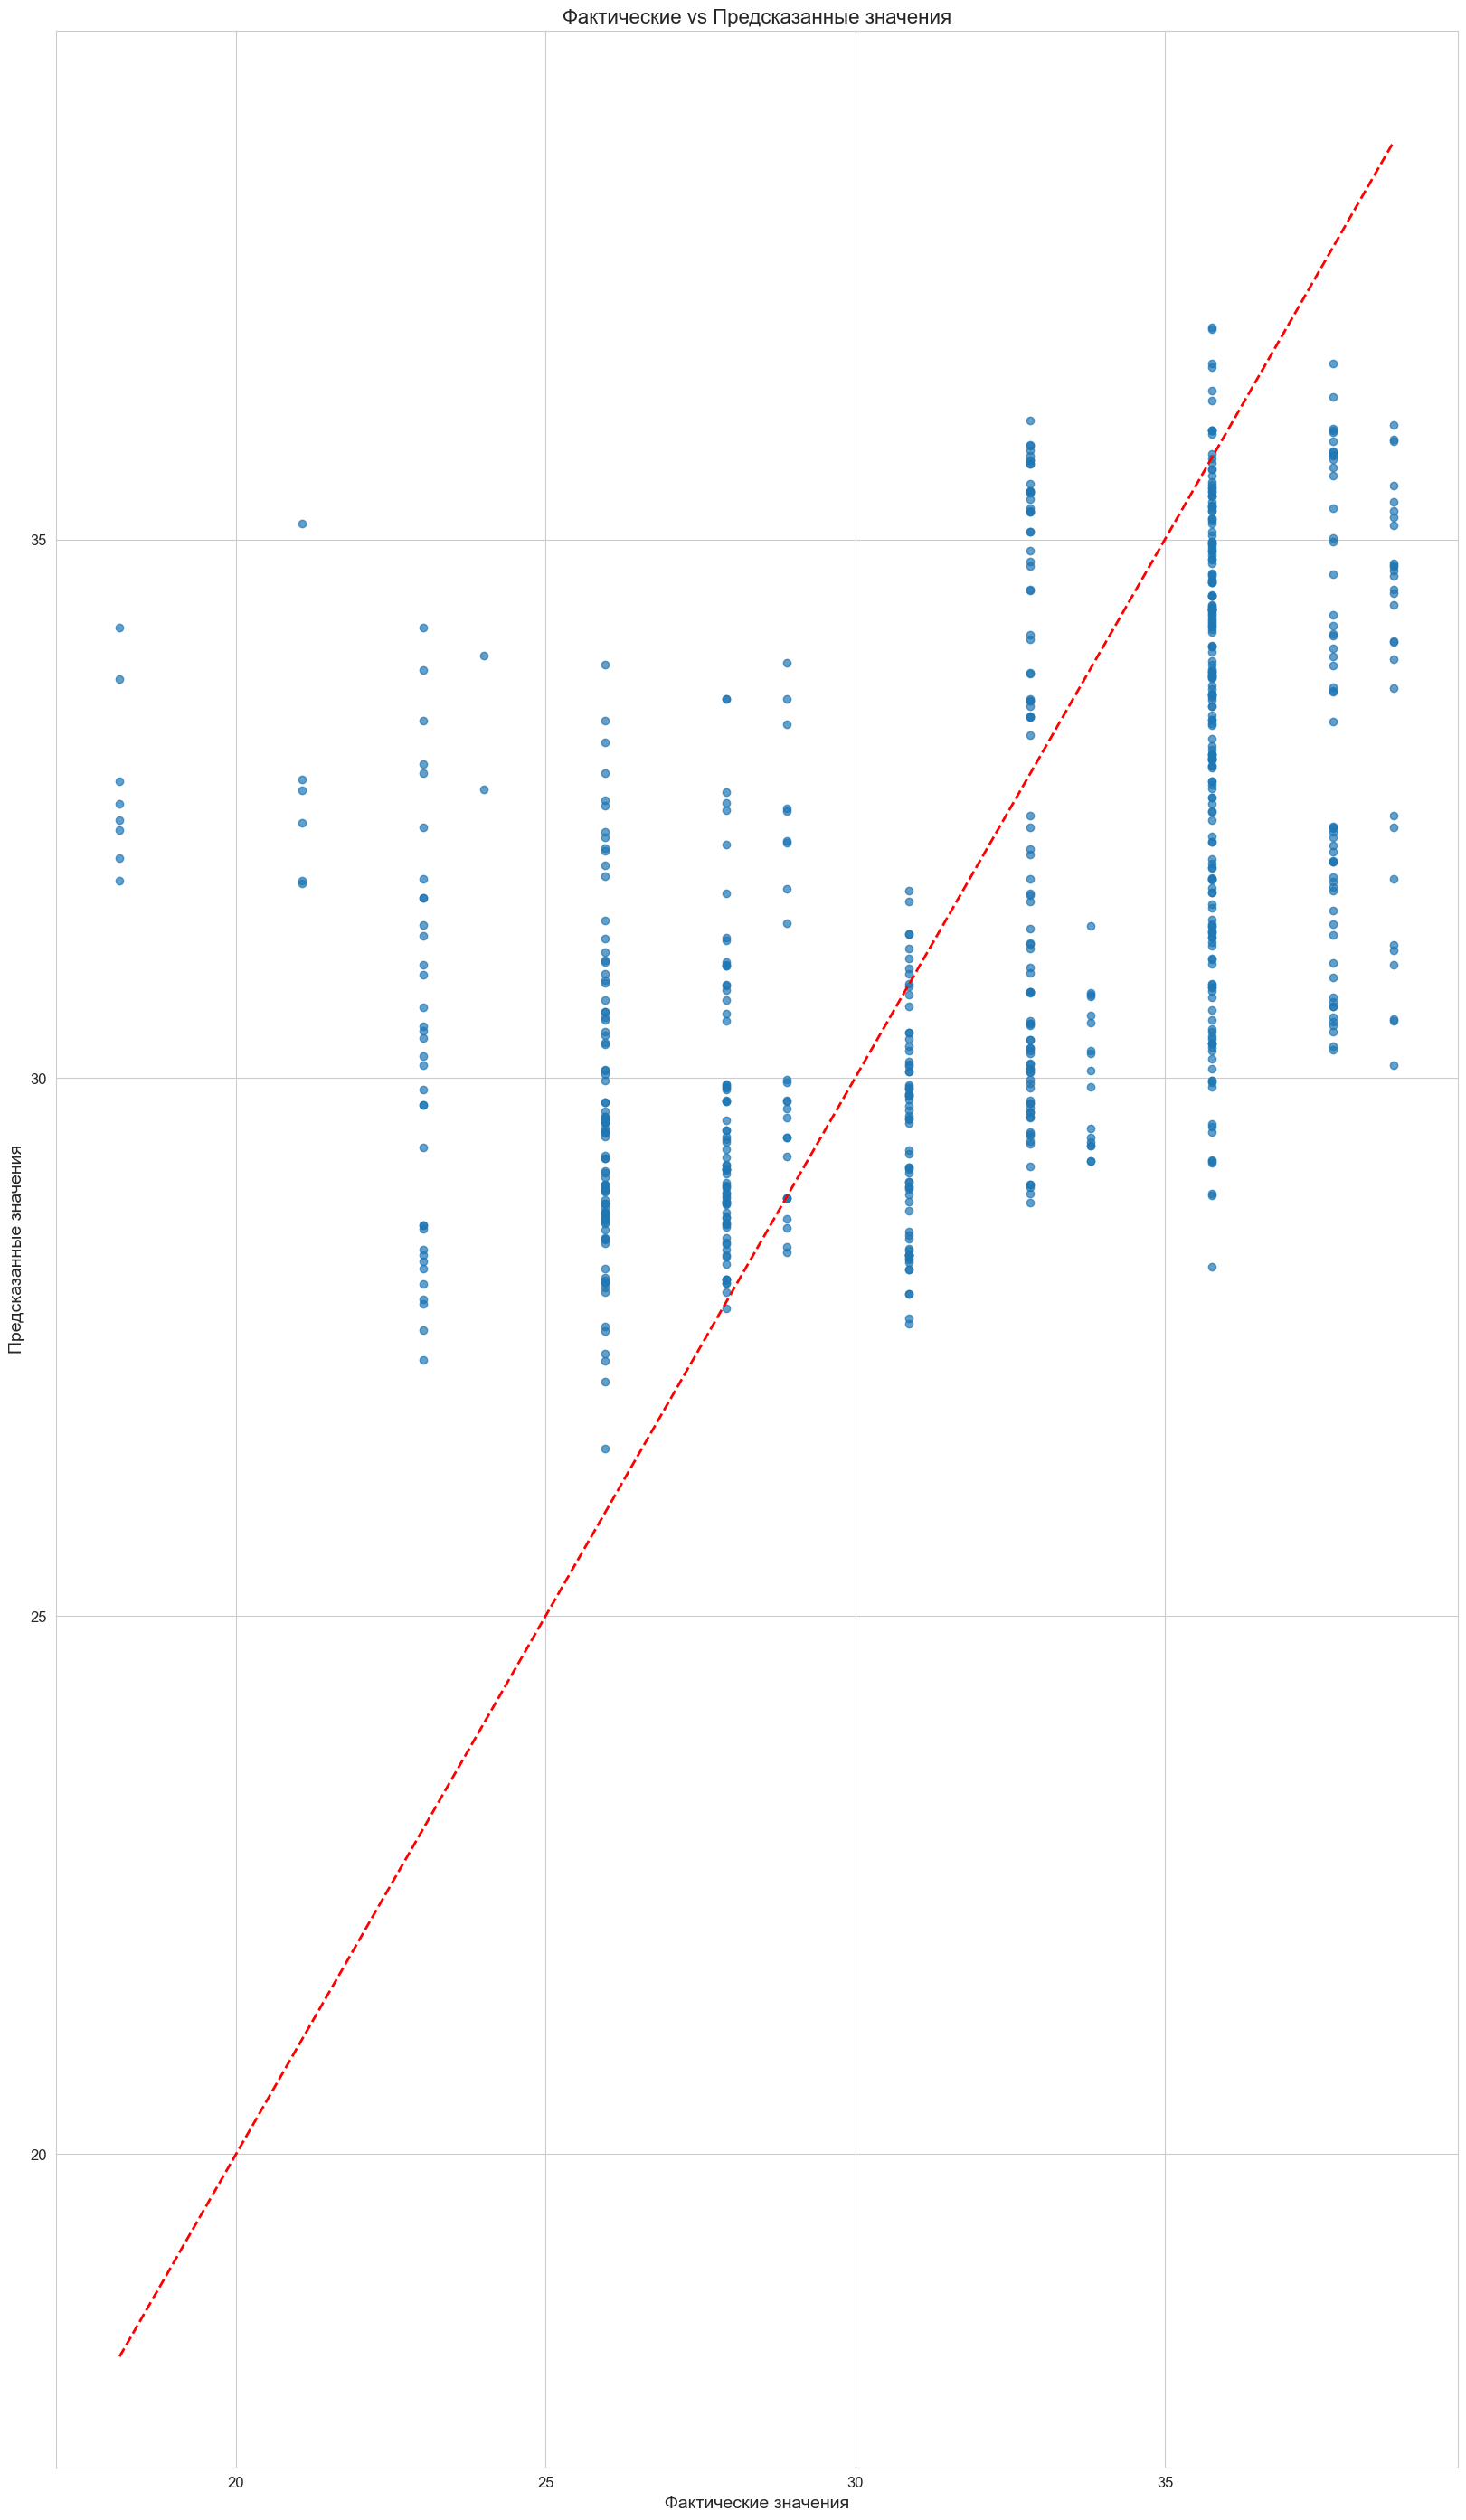

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from dataLoader import DataLoader
from dataProcessing import DataProcessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
loader = DataLoader()
df = loader.load_csv('Coffe_sales.csv')

# Обработка данных
processor = DataProcessing(df)
processor.remove_duplicates()
processor.fill_missing_values(strategy='mean')
processed_df = processor.get_processed_data()
# Предобработка данных
# Кодируем категориальные переменные
label_encoders = {}
categorical_cols = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']

for col in categorical_cols:
    le = LabelEncoder()
    processed_df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# Выбираем признаки и целевую переменную
# хотим предсказать сумму покупки
X = processed_df[['hour_of_day', 'cash_type_encoded', 'coffee_name_encoded',
        'Time_of_Day_encoded', 'Weekday_encoded', 'Month_name_encoded',
        'Weekdaysort', 'Monthsort']]

y = processed_df['money']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nОценка модели:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Коэффициенты модели
print(f"\nКоэффициенты модели:")
for i, col in enumerate(X.columns):
    print(f"{col}: {model.coef_[i]:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

# Визуализация результатов
if len(y_test) > 1:
    plt.figure(figsize=(20, 35))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Фактические vs Предсказанные значения')
    plt.show()
